# 코딩테스트 연습

## 1. 완전탐색

### 3) 소수찾기

- numbers는 길이 1 이상 7이하 인 문자열
- numbers는 0~9까지 숫자만으로 이루어짐
- numbers를 조합해서 소수인 숫자를 찾아라 (answer)

순열..을 해야할 것 같은데 이걸 코드를 다만들어야되나 하던 찰나 -> 해당 관련해서 건웅님이 도움주심 <br/>
코테에서 내장함수는 써도 된다고 해서 알려주심! <br/>
https://velog.io/@rhdmstj17/%EC%88%9C%EC%97%B4-%EC%A4%91%EB%B3%B5%EC%88%9C%EC%97%B4-%EC%A1%B0%ED%95%A9-%EC%A4%91%EB%B3%B5%EC%A1%B0%ED%95%A9-%EC%A7%81%EC%A0%91-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-python-itertools-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC#%EC%88%9C%EC%97%B4permutations
내용참고

1. 순열 (단, 011 = 11 은 동일한 숫자)
2. 소수인 숫자만

In [23]:
from itertools import permutations

per_list = []

for i in permutations([1, 3, 1], 3):
	per_list.append(i)

In [24]:
per_list

[(1, 3, 1), (1, 1, 3), (3, 1, 1), (3, 1, 1), (1, 1, 3), (1, 3, 1)]

In [26]:
print(per_list[0][0] * 100 + per_list[0][1] * 10 + per_list[0][2] * 1)

131


In [27]:
per_list = []

for i in permutations('131', 3):
	per_list.append(i)

In [28]:
per_list

[('1', '3', '1'),
 ('1', '1', '3'),
 ('3', '1', '1'),
 ('3', '1', '1'),
 ('1', '1', '3'),
 ('1', '3', '1')]

In [30]:
print(int(per_list[0][0]) * 100 + int(per_list[0][1]) * 10 + int(per_list[0][2]) * 1)

131


In [74]:
numbers = "011"

per_list = []

for i in range(1, len(numbers)+1):
    for j in permutations(numbers, i):
        per_list.append(j)

In [33]:
per_list

[('1',), ('7',), ('1', '7'), ('7', '1')]

In [52]:
10**0

1

In [75]:
int_list = []

for idx, val in enumerate(per_list):
    num = 0

    for j in range(0, len(val)):
        num += int(per_list[idx][j]) * 10**(len(val)-1-j)
    
    if num not in int_list:
        int_list.append(num)

In [79]:
int_list

[0, 1, 10, 11, 101, 110]

In [82]:
# 소수
num = []
for i in range(2, 11+1):
    if 11 % i == 0:
        num.append(i)

if len(num) == 1:
    print("소수입니다~")
else:
    print("소수가 아닙니다~")

소수입니다~


In [86]:
for i in int_list:
    num = []
    for j in range(2, i+1):
        if i % j == 0:
            num.append(j)

    if len(num) == 1:
        print("소수입니다~")
    else:
        print("소수가 아닙니다~")

0
소수가 아닙니다~
1
소수가 아닙니다~
10
소수가 아닙니다~
11
소수입니다~
101
소수입니다~
110
소수가 아닙니다~


In [87]:
from itertools import permutations

def solution(numbers):
    answer = 0
    per_list = []

    for i in range(1, len(numbers)+1):
        for j in permutations(numbers, i):
            per_list.append(j)
    
    int_list = []

    for idx, val in enumerate(per_list):
        num = 0

        for j in range(0, len(val)):
            num += int(per_list[idx][j]) * 10**(len(val)-1-j)

        if num not in int_list:
            int_list.append(num)
    
    for i in int_list:
        num = []
        for j in range(2, i+1):
            if i % j == 0:
                num.append(j)

        if len(num) == 1:
            answer += 1
        else:
            pass
    
    return answer

In [88]:
solution("011")

2

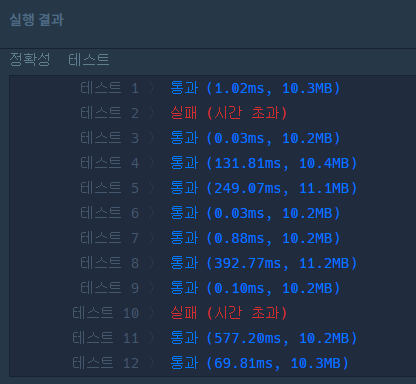 <br/>
첫번째 결과 시간초과로 실패..

예상으로 짧은 numbers는 괜찮은데 문자열이 7개인경우 길어지면서 시간이 초과되는 것 같음.

---

In [117]:
from itertools import permutations

def solution(numbers):
    answer = 0
    per_list = []

    for i in range(1, len(numbers)+1):
        for val in permutations(numbers, i):
            num = 0
            for j in range(0, len(val)):
                num += int(val[j]) * 10**(len(val)-1-j)

            if num not in per_list:
                per_list.append(num)
    
    for i in per_list:
        num = []
        for j in range(2, i+1):
            if i % j == 0:
                num.append(j)

        if len(num) == 1:
            answer += 1
        else:
            pass
    
    return answer

In [103]:
solution("011")

2

2번과 10번이 또 시간초과가 뜸 -> 조건을 더 걸어서 거르는 작업을 해야..할것같음..

할 수 있는게
1. 맨앞자리가 0이면 보지않는 것
2. 소수찾기를 간단하게 할 수 있는 방법 찾기
    - 참고 https://coding-of-today.tistory.com/169

In [124]:
from itertools import permutations

# 소수 판별을 제곱근까지만 확인
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0: # 나눠떨어지는 숫자가 있으면 소수 X
            return False
    return True # 전부 나눠떨어지지않으면 소수

def solution(numbers):
    answer = 0

    # 순열찾기
    per_list = []
    for i in range(1, len(numbers)+1):
        for val in permutations(numbers, i):
            num = 0
            for j in range(0, len(val)):
                if val[j] == 0:
                    pass
                else:
                    num += int(val[j]) * 10**(len(val)-1-j)

            if num not in per_list:
                per_list.append(num)
    
    # 소수개수확인
    for num in per_list:
        if is_prime(num):
            answer += 1
    
    return answer

In [123]:
solution("1258794")

938

---